In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from mpl_toolkits.mplot3d import Axes3D

## Problema #1:
Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede utilizar el enfoque que prefiera.

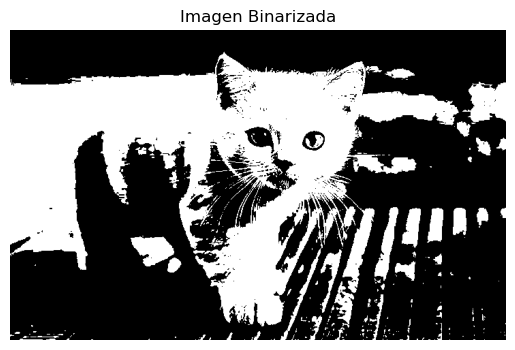

In [8]:
import cv2
import numpy as np

def binarizar_imagen_cv2(ruta_imagen, umbral=128):
    # Cargar la imagen en escala de grises
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    
    # Crear una matriz de ceros del mismo tamaño que la imagen
    imagen_binarizada = np.zeros_like(imagen)
    
    # Aplicar la binarización mmente
    filas, columnas = imagen.shape
    for fila in range(filas):
        for columna in range(columnas):
            if imagen[fila, columna] > umbral:
                imagen_binarizada[fila, columna] = 255
    
    return imagen_binarizada

# Cargando imagen
ruta_imagen = 'gato.jpg'

imagen_binarizada_cv2 = binarizar_imagen_cv2(ruta_imagen, umbral=128)

# Mostrar la imagen binarizada utilizando matplotlib
plt.imshow(imagen_binarizada_cv2, cmap='gray')
plt.title('Imagen Binarizada')
plt.axis('off')
plt.show()

## Problema #2:
Desarrolle una funcion que dada dos imagenes a color, realice las operaciones SUMA, RESTA, AND,OR , XOR con ambas imagenes recuerde que para realizar las operaciones logicas es necesario pasar la imagen a escala de grises y luego binarizarla.



In [16]:
def binarizar_m(imagen, umbral=128):
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    filas, columnas = gris.shape
    binarizada = np.zeros_like(gris)
    for fila in range(filas):
        for columna in range(columnas):
            if gris[fila, columna] > umbral:
                binarizada[fila, columna] = 255
    return binarizada

def normalizar_imagenes(imagen1, imagen2):
    alto_imagen1, ancho_imagen1, _ = imagen1.shape
    alto_imagen2, ancho_imagen2, _ = imagen2.shape
    
    alto_objetivo = min(alto_imagen1, alto_imagen2)
    ancho_objetivo = min(ancho_imagen1, ancho_imagen2)
    
    imagen1_normalizada = cv2.resize(imagen1, (ancho_objetivo, alto_objetivo))
    imagen2_normalizada = cv2.resize(imagen2, (ancho_objetivo, alto_objetivo))
    
    return imagen1_normalizada, imagen2_normalizada

def operaciones_logicas(imagen1, imagen2, umbral=128):
    imagen1, imagen2 = normalizar_imagenes(imagen1, imagen2)
    
    binarizada1 = binarizar_m(imagen1, umbral)
    binarizada2 = binarizar_m(imagen2, umbral)
    
    suma = cv2.add(binarizada1, binarizada2)
    resta = cv2.subtract(binarizada1, binarizada2)
    and_op = cv2.bitwise_and(binarizada1, binarizada2)
    or_op = cv2.bitwise_or(binarizada1, binarizada2)
    xor = cv2.bitwise_xor(binarizada1, binarizada2)
    
    return suma, resta, and_op, or_op, xor


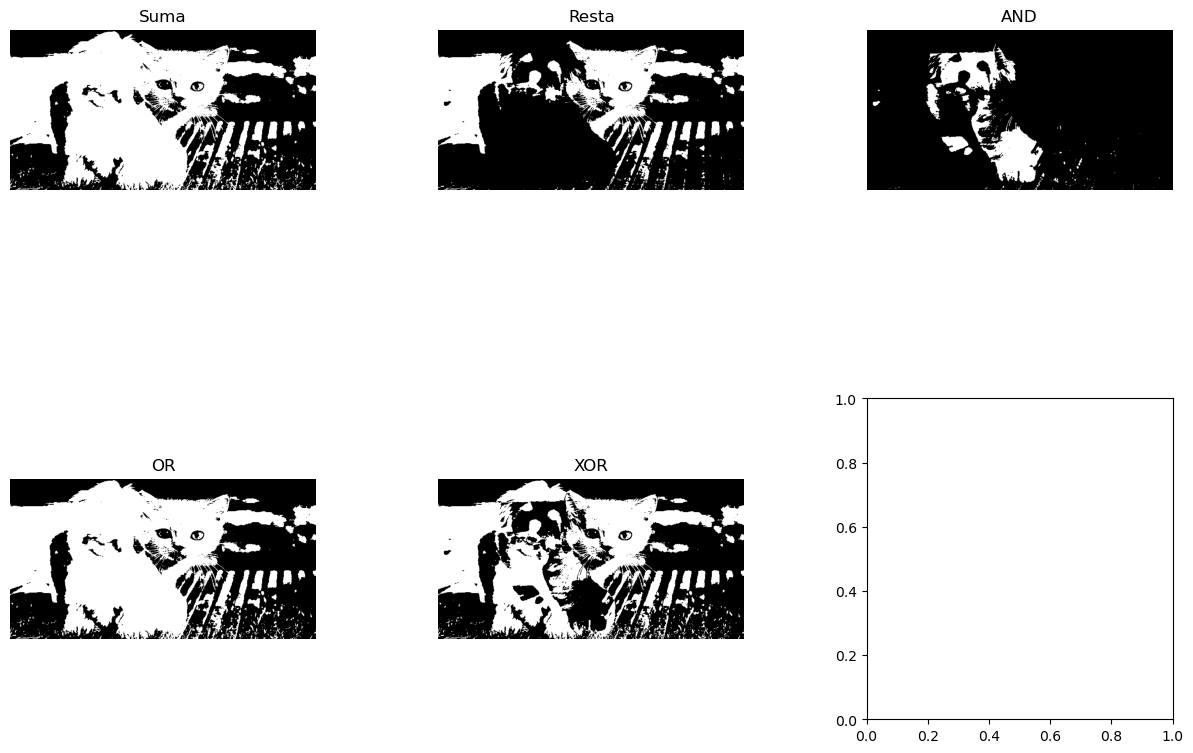

In [17]:
imagen1 = cv2.imread('gato.jpg')
imagen2 = cv2.imread('perro.jpg')

suma, resta, and_op, or_op, xor = operaciones_logicas(imagen1, imagen2, umbral=128)

# Mostrar las imágenes 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(suma, cmap='gray')
axes[0, 0].set_title('Suma')
axes[0, 0].axis('off')
axes[0, 1].imshow(resta, cmap='gray')
axes[0, 1].set_title('Resta')
axes[0, 1].axis('off')
axes[0, 2].imshow(and_op, cmap='gray')
axes[0, 2].set_title('AND')
axes[0, 2].axis('off')
axes[1, 0].imshow(or_op, cmap='gray')
axes[1, 0].set_title('OR')
axes[1, 0].axis('off')
axes[1, 1].imshow(xor, cmap='gray')
axes[1, 1].set_title('XOR')
axes[1, 1].axis('off')

# Espacio entre las imágenes
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

# Problema #3:
Desarrolle una funcion que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

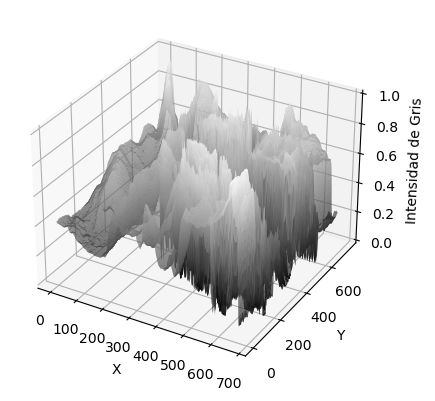

In [21]:

def mostrar_imagen_3d(imagen):
    # Crear ejes X e Y
    y, x = np.meshgrid(np.arange(imagen.shape[1]), np.arange(imagen.shape[0]))
    
    # Crear una representación de los ejes X, Y y Z con los valores de intensidad de gris
    z = imagen
    
    # Escalar la intensidad para ajustar a los valores RGB
    z_scaled = (z - np.min(z)) / (np.max(z) - np.min(z))
    
    # Crear una figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Mostrar la superficie 3D
    superficie = ax.plot_surface(x, y, z_scaled, cmap='gray', rstride=1, cstride=1)
    
    # Configurar etiquetas de ejes
    ax.set_xlabel('X') # variable X
    ax.set_ylabel('Y') # variable Y
    ax.set_zlabel('Intensidad de Gris')
    
    # Mostrar la figura
    plt.show()

# Cargar la imagen en escala de grises
imagen_gris = cv2.imread('horse_gray2.jpg', cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen en 3D con matplotlib
mostrar_imagen_3d(imagen_gris)

# Problema #4:
Implemente una función para cada una de las trasformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

In [27]:
def trans_negativa(imagen):
    # transformación negativa
    imagen_negativa = 255 - imagen
    return imagen_negativa

def trans_lineal(imagen, pendiente, interseccion):
    # transformación lineal 
    imagen_lineal = pendiente * imagen + interseccion
    imagen_lineal = np.clip(imagen_lineal, 0, 255).astype(np.uint8)
    return imagen_lineal

def trans_logaritmica(imagen, c):
    # transformación logarítmica 
    imagen_logaritmica = c * np.log(1 + imagen)
    imagen_logaritmica = np.clip(imagen_logaritmica, 0, 255).astype(np.uint8)
    return imagen_logaritmica

def trans_exponencial(imagen, gamma):
    # transformación exponencial 
    imagen_exponencial = np.power(imagen, gamma)
    imagen_exponencial = np.clip(imagen_exponencial, 0, 255).astype(np.uint8)
    return imagen_exponencial


In [28]:

imagen = cv2.imread('horse_gray2.jpg', cv2.IMREAD_GRAYSCALE)

# Transformación negativa
imagen_negativa_m = trans_negativa(imagen)

# Transformación lineal
pendiente = 1.5
interseccion = 50
imagen_lineal_m = trans_lineal(imagen, pendiente, interseccion)

# Transformación logarítmica
c = 50
imagen_logaritmica_m = trans_logaritmica(imagen, c)

# Transformación exponencial
gamma = 0.5
imagen_exponencial_m = trans_exponencial(imagen, gamma)


C:\Users\Oscar\AppData\Local\Temp\ipykernel_12116\1347042186.py:14: RuntimeWarning: divide by zero encountered in log
  imagen_logaritmica = c * np.log(1 + imagen)


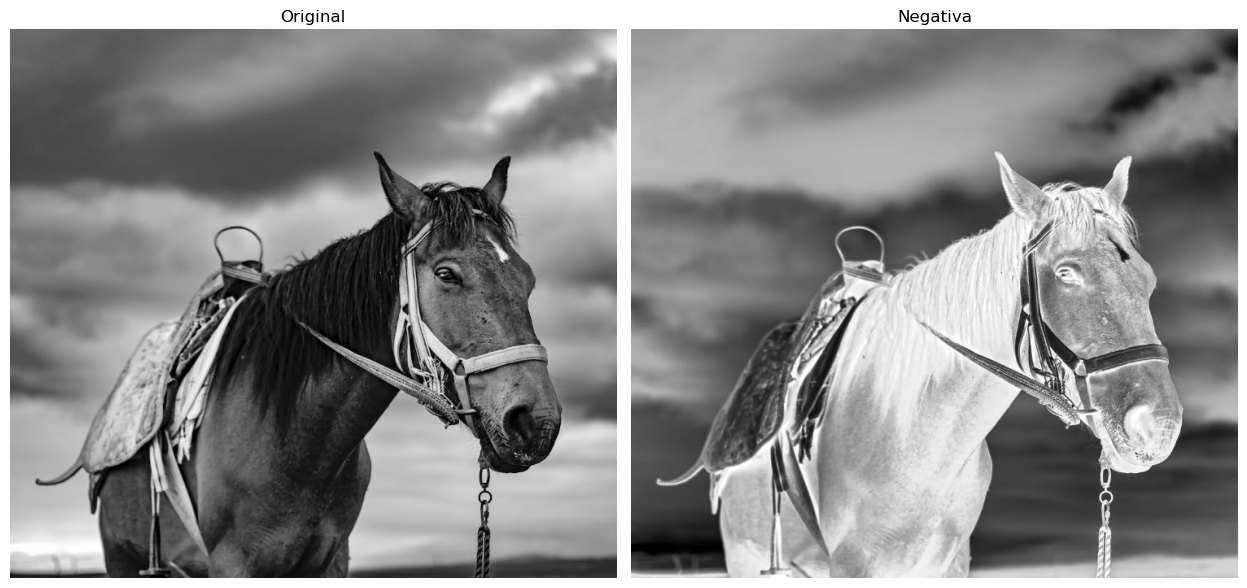

In [47]:
plt.figure(figsize=(25, 20))

plt.subplot(2, 4, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(imagen_negativa_m, cmap='gray')
plt.title('Negativa')
plt.axis('off')
plt.tight_layout()
plt.show()

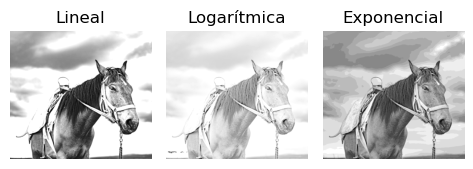

In [51]:
plt.subplot(2, 4, 1)
plt.imshow(imagen_lineal_m, cmap='gray')
plt.title('Lineal')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(imagen_logaritmica_m, cmap='gray')
plt.title('Logarítmica')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(imagen_exponencial_m, cmap='gray')
plt.title('Exponencial')
plt.axis('off')

plt.tight_layout()
plt.show()

# Problema #5:
Desarrolle una funcion que dada una imagen a color, cualquier kernel con cualquier dimensión (3X3, 5X5, 7X7, 9X9, 11X11) y cualquier tipo (gaussiano, Sobel, Sharp, unsharp, laplaciano), aplique un filtro de convoluci´on a dicha imagen y muestre la imagen original y la imagen filtrada. Le recomendamos implementar el kernel como un arreglo de numpy.


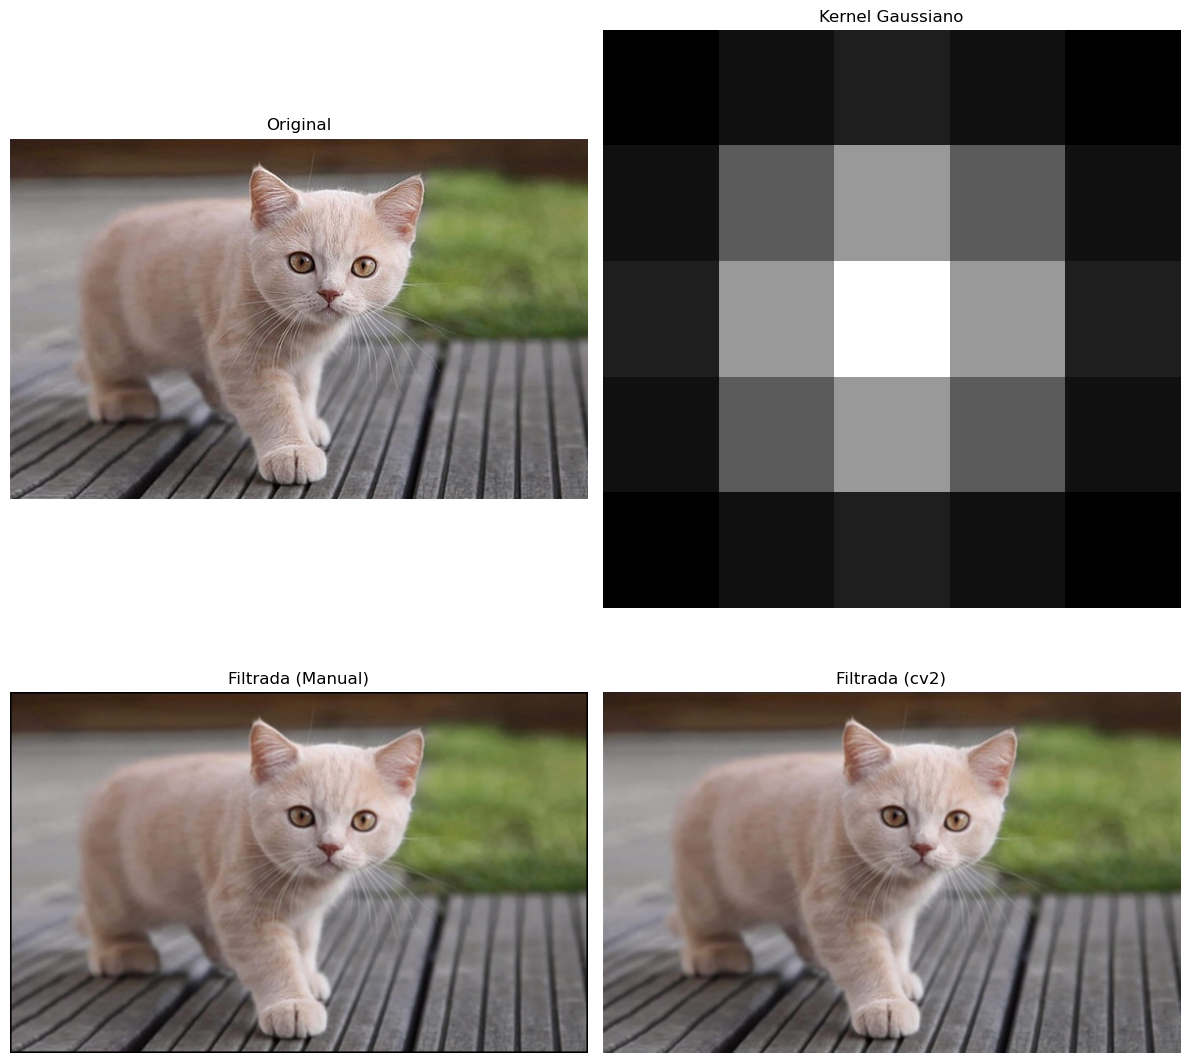

In [61]:
def aplicar_filtro_conv_gaussiano(imagen, kernel):
    imagen_filtrada = np.zeros_like(imagen)
    altura, ancho, _ = imagen.shape
    k_size = kernel.shape[0]
    padding = k_size // 2
    
    for y in range(padding, altura - padding):
        for x in range(padding, ancho - padding):
            for c in range(3):  # Iterar sobre los canales de color (R, G, B)
                roi = imagen[y - padding:y + padding + 1, x - padding:x + padding + 1, c]
                pixel_filtrado = np.sum(roi * kernel)
                imagen_filtrada[y, x, c] = pixel_filtrado
    
    return imagen_filtrada

# Cargar la imagen a color
imagen = cv2.imread('gato.jpg')

# Crear kernel Gaussiano 
k_size = 5
sigma = 1.0
kernel = np.zeros((k_size, k_size))

for y in range(-k_size//2 + 1, k_size//2 + 1):
    for x in range(-k_size//2 + 1, k_size//2 + 1):
        kernel[y + k_size//2, x + k_size//2] = np.exp(-(x**2 + y**2) / (2 * sigma**2))

kernel /= np.sum(kernel)

# filtro de convolución gaussiano 
imagen_filtrada_manual = aplicar_filtro_conv_gaussiano(imagen, kernel)


plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(kernel, cmap='gray')
plt.title('Kernel Gaussiano')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(imagen_filtrada_manual, cv2.COLOR_BGR2RGB))
plt.title('Filtrada (Manual)')
plt.axis('off')

# Aplicar el filtro de convolución gaussiano utilizando cv2
imagen_filtrada_cv2 = cv2.filter2D(imagen, -1, kernel)

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(imagen_filtrada_cv2, cv2.COLOR_BGR2RGB))
plt.title('Filtrada (cv2)')
plt.axis('off')

plt.tight_layout()
plt.show()


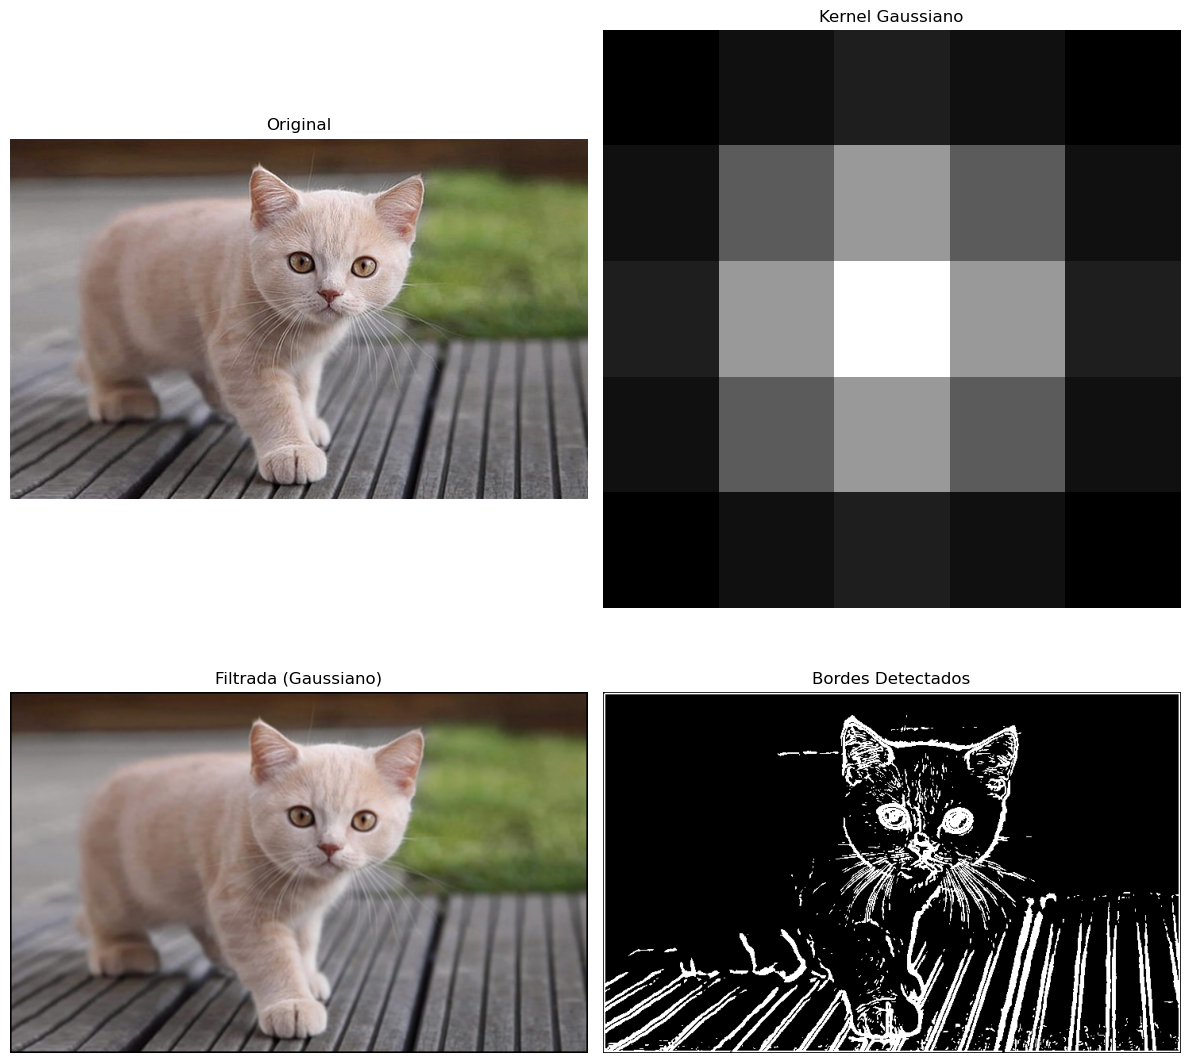

In [62]:
def aplicar_filtro_conv_gaussiano(imagen, kernel):
    imagen_filtrada = np.zeros_like(imagen)
    altura, ancho, _ = imagen.shape
    k_size = kernel.shape[0]
    padding = k_size // 2
    
    for y in range(padding, altura - padding):
        for x in range(padding, ancho - padding):
            for c in range(3):  # Iterar sobre los canales de color (R, G, B)
                roi = imagen[y - padding:y + padding + 1, x - padding:x + padding + 1, c]
                pixel_filtrado = np.sum(roi * kernel)
                imagen_filtrada[y, x, c] = pixel_filtrado
    
    return imagen_filtrada

# Cargar la imagen a color
imagen = cv2.imread('gato.jpg')

# Crear kernel Gaussiano 
k_size = 5
sigma = 1.0
kernel = np.zeros((k_size, k_size))

for y in range(-k_size//2 + 1, k_size//2 + 1):
    for x in range(-k_size//2 + 1, k_size//2 + 1):
        kernel[y + k_size//2, x + k_size//2] = np.exp(-(x**2 + y**2) / (2 * sigma**2))

kernel /= np.sum(kernel)

# Filtro de convolución gaussiano 
imagen_filtrada_manual = aplicar_filtro_conv_gaussiano(imagen, kernel)

# Convertir la imagen filtrada a escala de grises
imagen_filtrada_gris = cv2.cvtColor(imagen_filtrada_manual, cv2.COLOR_BGR2GRAY)

# filtro de Sobel para detectar bordes
gradiente_x = cv2.Sobel(imagen_filtrada_gris, cv2.CV_64F, 1, 0, ksize=3)
gradiente_y = cv2.Sobel(imagen_filtrada_gris, cv2.CV_64F, 0, 1, ksize=3)

# magnitud del gradiente
magnitud_gradiente = np.sqrt(gradiente_x**2 + gradiente_y**2)

# Aplicar umbral para detectar bordes
umbral = 50
bordes_detectados = np.where(magnitud_gradiente > umbral, 255, 0)

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(kernel, cmap='gray')
plt.title('Kernel Gaussiano')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(imagen_filtrada_manual, cv2.COLOR_BGR2RGB))
plt.title('Filtrada (Gaussiano)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(bordes_detectados, cmap='gray')
plt.title('Bordes Detectados')
plt.axis('off')

plt.tight_layout()
plt.show()

##### Laplaciano

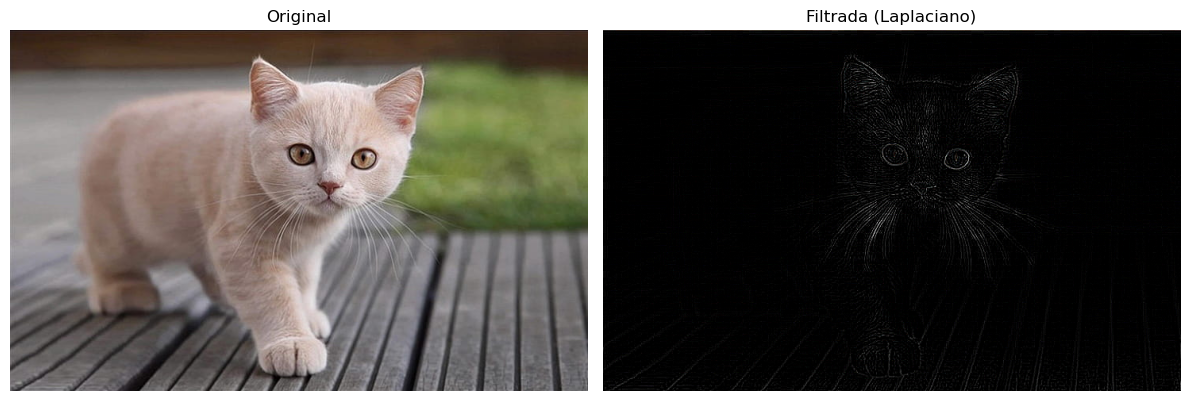

In [58]:
def aplicar_filtro_laplaciano(imagen):
    kernel_laplaciano = np.array([[0, 1, 0],
                                  [1, -4, 1],
                                  [0, 1, 0]])
    imagen_filtrada = cv2.filter2D(imagen, -1, kernel_laplaciano)
    return imagen_filtrada

# Cargar una imagen a color
imagen = cv2.imread('gato.jpg')

# filtro Laplaciano
imagen_filtrada_laplaciano = aplicar_filtro_laplaciano(imagen)

# imágen original y filtrada
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagen_filtrada_laplaciano, cv2.COLOR_BGR2RGB))
plt.title('Filtrada (Laplaciano)')
plt.axis('off')

plt.tight_layout()
plt.show()

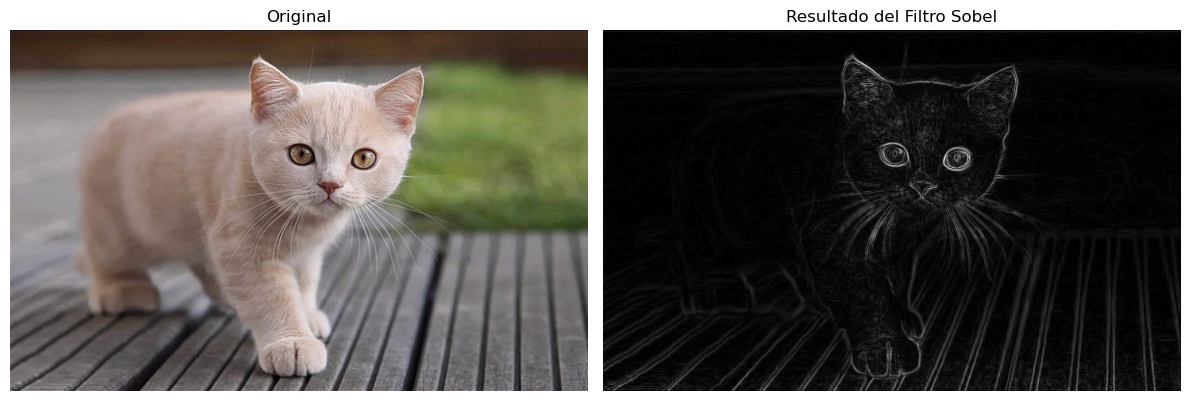

In [59]:
def aplicar_filtro_sobel(imagen):
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    #  filtro de Sobel en las direcciones X e Y
    gradiente_x = cv2.Sobel(imagen_gris, cv2.CV_64F, 1, 0, ksize=3)
    gradiente_y = cv2.Sobel(imagen_gris, cv2.CV_64F, 0, 1, ksize=3)
    
    # magnitud del gradiente
    magnitud_gradiente = np.sqrt(gradiente_x**2 + gradiente_y**2)
    
    return magnitud_gradiente

# Cargar una imagen a color
imagen = cv2.imread('gato.jpg')

# Aplicar el filtro de Sobel
magnitud_gradiente = aplicar_filtro_sobel(imagen)

# imágenes original y l filtro Sobel
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitud_gradiente, cmap='gray')
plt.title('Resultado del Filtro Sobel')
plt.axis('off')

plt.tight_layout()
plt.show()

# Problema #6

Investigue que hace el kernel Laplaceano y como este enfoque se diferencia de usar el algoritmo deCanny para la detección de bordes.


__Laplaciano__
Otra forma de enfatizar los bordes de una imagen es utilizar el filtro laplaciano. El laplaciano de una imagen ${f}{(x)}$ se define como:

$${\delta^2 f} =  \frac{\delta^2 f}{\delta x^2} + \frac{\delta^2 f}{\delta y^2} $$

Las derivadas segundas pueden aproximarse por:
$$\frac{\delta^2 f}{\delta x^2}  \approx {f (x+1,y)+ f(x-1,y)-2f(x,y) }  $$
$$\frac{\delta^2 f}{\delta y^2}  \approx {f (x,y+1)+ f(x, y-1)-2f(x,y) }  $$


Referencia : https://www.fceia.unr.edu.ar/dip/Filtrado_Espacial.pdf

El Laplaciano es una medida isotrópica bidimensional de la segunda derivada espacial de una imagen. El laplaciano de una imagen resalta las regiones de cambio rápido de intensidad y, por lo tanto, a menudo se usa para la detección de bordes (ver detectores de bordes de cruce por cero ). El laplaciano a menudo se aplica a una imagen que primero se ha suavizado con algo parecido a un filtro de suavizado gaussiano para reducir su sensibilidad al ruido y, por lo tanto, las dos variantes se describirán juntas aquí. El operador normalmente toma una sola imagen de nivel de gris como entrada y produce otra imagen de nivel de gris como salida



Referencia: https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm

__Canny__
Algoritmo de Canny es un operador desarrollado por John F. Canny en 1986 que utiliza un algoritmo de múltiples etapas para detectar una amplia gama de bordes en imágenes.

El algoritmo de detección de bordes de Canny utiliza un filtro basado en la primera derivada de una gaussiana. Ya que es susceptible al ruido presente en datos de imagen sin procesar, la imagen original es transformada con un filtro gaussiano. El resultado es una imagen un poco borrosa respecto a la versión original. Esta nueva imagen no se ve afectada por un píxel único de ruido en un grado significativo.

Referencia: Canny, J., A Computational Approach To Edge Detection, IEEE Trans. 
Pattern Analysis and Machine Intelligence, 8(6):679–698, 
1986

https://es.wikipedia.org/wiki/Algoritmo_de_Canny#:~:text=El%20algoritmo%20de%20detecci%C3%B3n%20de,respecto%20a%20la%20versi%C3%B3n%20original.

__Diferencia entre el Kernel Laplaciano y Canny__

El kernel Laplaciano, también conocido como operador Laplaciano, es un operador diferencial utilizado en procesamiento de imágenes para detectar regiones de cambio abrupto en la intensidad de los píxeles, lo que suele estar asociado con bordes y detalles. Se aplica mediante una operación de convolución en la imagen original utilizando un kernel específicamente diseñado. El kernel Laplaciano calcula la suma de las segundas derivadas parciales de la imagen y busca maximizar el valor cuando se cruza un borde. La convolución con el kernel Laplaciano realza los cambios rápidos en la intensidad y atenúa las áreas con cambios más suaves.

Por otro lado, el algoritmo de Canny es un enfoque más completo y sofisticado para la detección de bordes en imágenes. A diferencia del kernel Laplaciano, el algoritmo de Canny consta de múltiples etapas y proporciona una detección de bordes más precisa y con menos ruido. Las etapas principales del algoritmo de Canny son las siguientes:

Suavizado (Blurring): Se aplica un filtro de suavizado (como el filtro Gaussiano) para reducir el ruido y eliminar detalles no deseados.

Cálculo del Gradiente: Se calculan las derivadas parciales (gradientes) de la imagen en las direcciones horizontal y vertical para determinar la magnitud y la dirección del cambio en la intensidad de los píxeles.

Supresión de No Máximos: Se identifican los píxeles que forman un borde y se retiene solo el píxel con la magnitud de gradiente máxima en una dirección determinada.

Umbralización Doble: Se aplican umbrales para determinar qué bordes se consideran reales y cuáles se descartan. El algoritmo utiliza umbrales bajo y alto para clasificar los píxeles en bordes fuertes, bordes débiles y píxeles no bordes.

Histeresis: Los píxeles clasificados como bordes débiles se consideran bordes si están conectados a bordes fuertes. Esto ayuda a eliminar bordes falsos.

En comparación con el kernel Laplaciano, el algoritmo de Canny es más efectivo para reducir el ruido y seleccionar bordes reales. Proporciona una detección de bordes más precisa y también tiene la ventaja de ofrecer umbralización adaptativa para ajustar la sensibilidad de detección según las características de la imagen.

Mientras que el kernel Laplaciano se enfoca en realzar cambios abruptos en la intensidad de los píxeles, el algoritmo de Canny sigue un enfoque más completo y sistemático que involucra múltiples etapas para lograr una detección de bordes más precisa y robusta.

# Problema extra


Implemente una función que sugiera si una imagen en escala de grises requiere o no la ecualización de su histograma, para esto puede utilizar un valor entre 0 a 1, donde 0 significarıa que la imagen no requiere ecualizacion y 1 significarıa que la imagen requiere ecualizacion fuertemente, si el valores mayor a 0.5 su funcion debe realizar la ecualizacion de histograma.

In [71]:
def suggest_histogram_equalization(image, threshold=0.5):
    # Verificar si la imagen está en escala de grises
    if len(image.shape) > 2:
        raise ValueError("La imagen no está en escala de grises.")

    # histograma de la imagen
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Normalizar el histograma
    hist /= hist.sum()

    # acumulación del histograma
    cdf = hist.cumsum()

    # la puntuación de ecualización (diferencia entre valores extremos)
    score = cdf[-1] - cdf[0]

    # puntuación de la forma del histograma (varianza)
    mean = cdf.mean()
    variance = ((cdf - mean) ** 2).sum() / hist.shape[0]

    # puntuación total como una combinación de las dos puntuaciones anteriores
    total_score = (1 - threshold) * score + threshold * variance

    # Determinar si se necesita ecualización basada en la puntuación total
    if total_score > threshold:
        equalize = True
    else:
        equalize = False

    return total_score, equalize


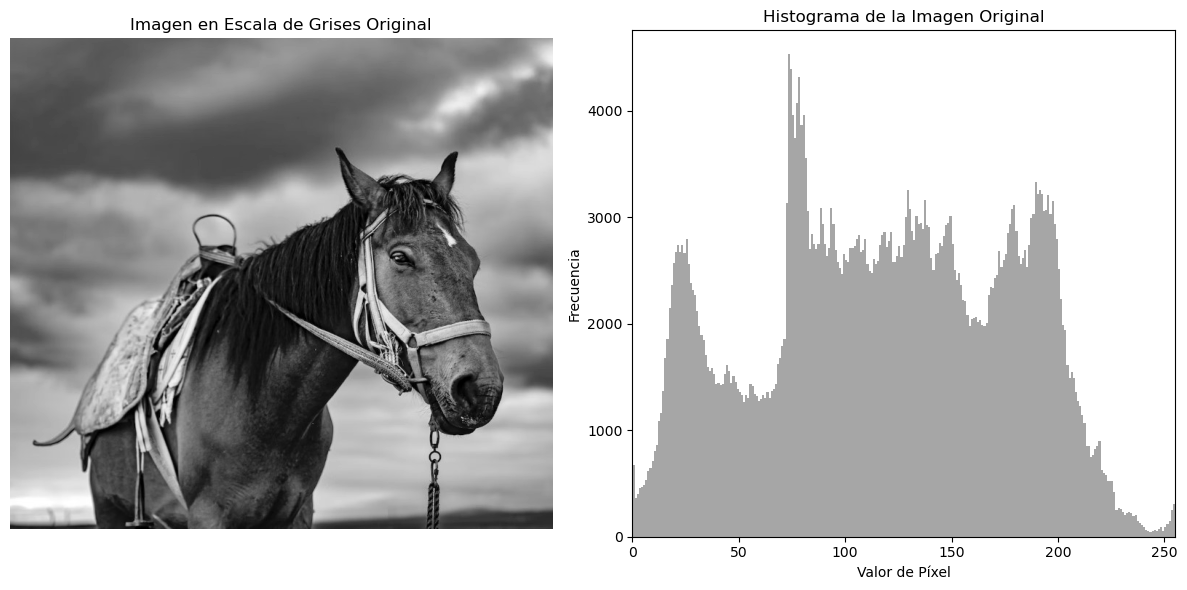

Puntuación total: 0.558229573071003
La imagen requiere ecualización de histograma.


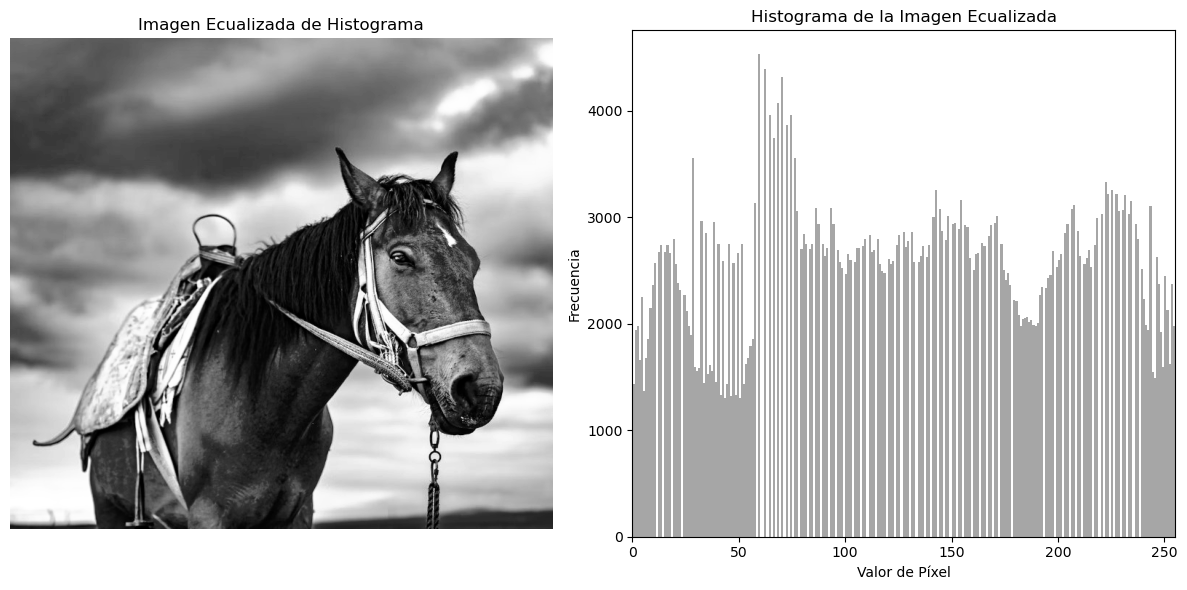

In [72]:

#  imagen en escala de grises
image_path = "horse_gray2.jpg"
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#  histograma de la imagen original en escala de grises
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen en Escala de Grises Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(gray_image.ravel(), bins=256, range=[0,256], color='gray', alpha=0.7)
plt.title('Histograma de la Imagen Original')
plt.xlabel('Valor de Píxel')
plt.ylabel('Frecuencia')
plt.xlim(0, 255)

plt.tight_layout()
plt.show()

#puntuación total y si se necesita ecualización
score, needs_equalization = suggest_histogram_equalization(gray_image)

print(f"Puntuación total: {score}")
if needs_equalization:
    print("La imagen requiere ecualización de histograma.")
else:
    print("La imagen no requiere ecualización de histograma.")

# ecualización de histograma en caso de necesitarlo
if needs_equalization:
    equalized_image = cv2.equalizeHist(gray_image)
    
    #  histograma de la imagen ecualizada
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Imagen Ecualizada de Histograma')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.hist(equalized_image.ravel(), bins=256, range=[0,256], color='gray', alpha=0.7)
    plt.title('Histograma de la Imagen Ecualizada')
    plt.xlabel('Valor de Píxel')
    plt.ylabel('Frecuencia')
    plt.xlim(0, 255)

    plt.tight_layout()
    plt.show()